In [95]:
%%capture --no-display
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from scipy import stats 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv("battery_ml (1).csv")
dataset.head()

,Unnamed: 0,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,...,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2,cycle_life
0,0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-0.000214,1.091381,1.070689,1.075913,...,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.0,-0.000075,1852
1,1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,0.000007,1.080926,1.075301,1.080630,...,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.0,-0.000042,2160
2,2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,0.000011,1.084805,1.079922,1.084940,...,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.0,-0.000014,2237
3,3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,0.000018,1.084030,1.079723,1.084750,...,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.0,0.000039,1434
4,4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,0.000020,1.081825,1.078417,1.082646,...,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.0,-0.000053,1709


In [4]:
dataset["dq_skewness"].unique()

array([-0.53205847, -0.4293749 , -1.08019428, -0.43905046, -0.36254813,
       -0.14935015, -0.40793585, -0.33341662, -0.42759103, -0.59484789,
       -0.28245264, -0.48199855, -0.12294983, -0.25598795, -0.05207889,
       -0.27342366,  0.24167277, -0.09016665, -0.1431744 , -0.33886311,
       -0.35793478, -0.11706816, -0.28951852, -0.14263301, -0.13762996,
       -0.28519142, -0.11073293, -0.15565603,  0.06483211, -0.15090116,
       -0.09448727, -0.02412039, -0.23647587, -0.06381042, -0.15250233,
       -0.24850466, -0.23135631, -0.10769408, -0.23725354,  0.13907985,
        0.11519777,  0.48886246,  0.93099681, -0.1701988 ,  0.42206091,
        0.16003399, -0.07932933,  0.43526052,  0.1655272 ,  0.08801698,
        0.35160163, -0.05069899, -0.11279803, -0.30070861,  0.09958102,
       -0.03846874,  0.08476558,  0.12807503, -0.05347868,  0.26760538,
       -0.14064401, -0.02246698,  0.07486354, -0.09078191, -0.13164807,
       -0.28576738, -0.19911426, -0.00459396, -0.20838006, -0.07

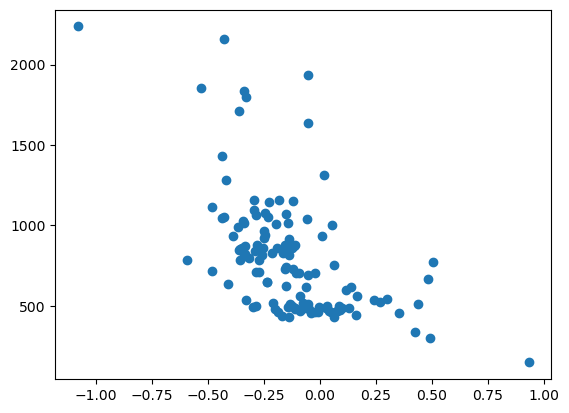

In [5]:
plt.scatter((dataset['dq_skewness']),dataset['cycle_life'])

In [6]:
dataset.corr()

,Unnamed: 0,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,...,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2,cycle_life
Unnamed: 0,1.000000,0.211280,0.184735,-0.171452,0.055986,0.030675,0.092048,-0.641932,-0.574866,-0.342367,...,0.048995,-0.554060,-0.484286,0.453690,0.392468,0.813673,-0.390828,0.769640,0.123309,0.052640
dq_min,0.211280,1.000000,0.992291,-0.947379,-0.738665,-0.049110,0.627572,-0.247067,-0.182889,0.364960,...,0.720281,-0.454936,0.323653,0.471383,0.493959,0.097880,-0.396222,-0.187527,0.219502,0.736817
dq_mean,0.184735,0.992291,1.000000,-0.960750,-0.790012,-0.086332,0.683584,-0.225545,-0.159874,0.422304,...,0.765695,-0.434849,0.314264,0.443113,0.471553,0.048783,-0.342543,-0.195377,0.225620,0.698028
dq_variance,-0.171452,-0.947379,-0.960750,1.000000,0.687376,0.183441,-0.755600,0.177773,0.097456,-0.511684,...,-0.834500,0.402506,-0.215013,-0.407311,-0.441578,0.024383,0.305289,0.182286,-0.210517,-0.556194
dq_skewness,0.055986,-0.738665,-0.790012,0.687376,1.000000,0.001947,-0.605724,0.095343,0.065193,-0.434169,...,-0.650611,0.260087,-0.408796,-0.218066,-0.256181,0.125136,0.103289,0.281274,-0.193233,-0.564596
dq_kurtosis,0.030675,-0.049110,-0.086332,0.183441,0.001947,1.000000,-0.395084,-0.122143,-0.112251,-0.396788,...,-0.411498,-0.007456,0.199055,0.119593,0.084610,0.249668,-0.265156,0.013455,-0.018920,0.346107
slope_100_2,0.092048,0.627572,0.683584,-0.755600,-0.605724,-0.395084,1.000000,-0.079054,0.073269,0.756893,...,0.920268,-0.167547,0.062232,0.134521,0.182753,-0.176097,-0.024857,-0.071306,0.378328,0.219828
intercept_100_2,-0.641932,-0.247067,-0.225545,0.177773,0.095343,-0.122143,-0.079054,1.000000,0.938286,0.588056,...,-0.023581,0.869406,0.218156,-0.431129,-0.391835,-0.575403,0.392963,-0.480232,-0.081517,-0.074537
discharge_capacity_2,-0.574866,-0.182889,-0.159874,0.097456,0.065193,-0.112251,0.073269,0.938286,1.000000,0.675983,...,0.058313,0.884137,0.189208,-0.349454,-0.306871,-0.540515,0.252997,-0.469944,0.191249,-0.044585
discharge_capacity_100,-0.342367,0.364960,0.422304,-0.511684,-0.434169,-0.396788,0.756893,0.588056,0.675983,1.000000,...,0.739286,0.423471,0.212698,-0.155536,-0.091179,-0.516536,0.210189,-0.380888,0.285534,0.151356


<Figure size 3000x3000 with 0 Axes>

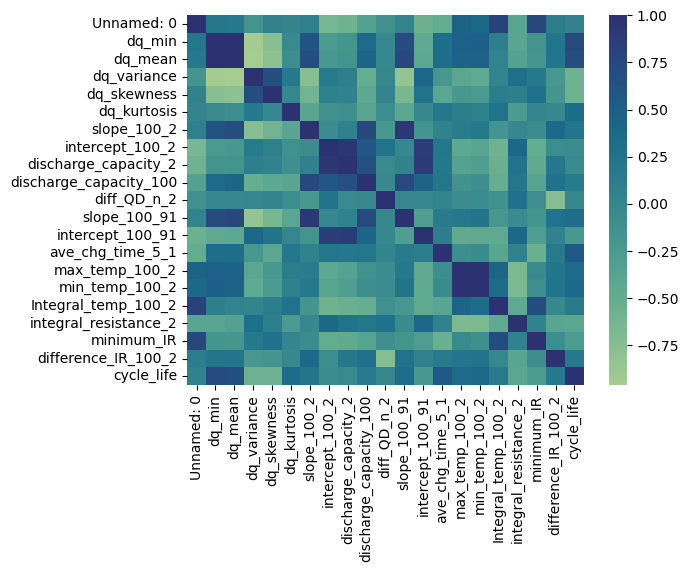

<Figure size 3000x3000 with 0 Axes>

In [96]:
sns.heatmap(dataset.corr(), cmap="crest")
plt.figure(figsize=(30,30))

In [8]:
dataset["cycle_life"]


0      1852
1      2160
2      2237
3      1434
4      1709
       ... 
119    1156
120     796
121     786
122     940
123    1801
Name: cycle_life, Length: 124, dtype: int64

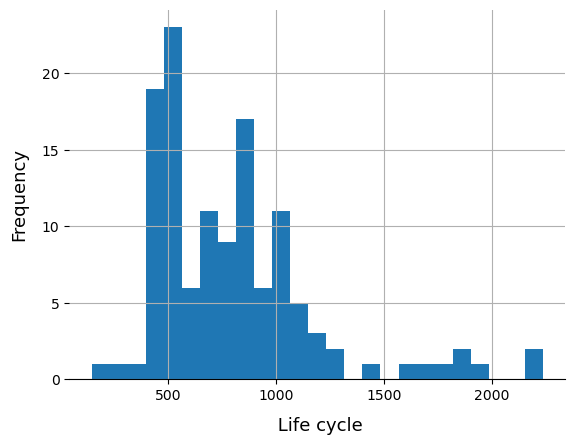

In [9]:
ax=dataset.hist(column='cycle_life',bins=25)
ax = ax[0] 
for x in ax:
    x.set_title("")
    x.set_xlabel(" Life cycle", labelpad=10, size=13)
    x.set_ylabel("Frequency", labelpad=10, size=13)

    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

In [10]:
import seaborn as sns

C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\2787820880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['cycle_life'],bins=25,kde=True,color='k')


<Axes: xlabel='cycle_life', ylabel='Density'>

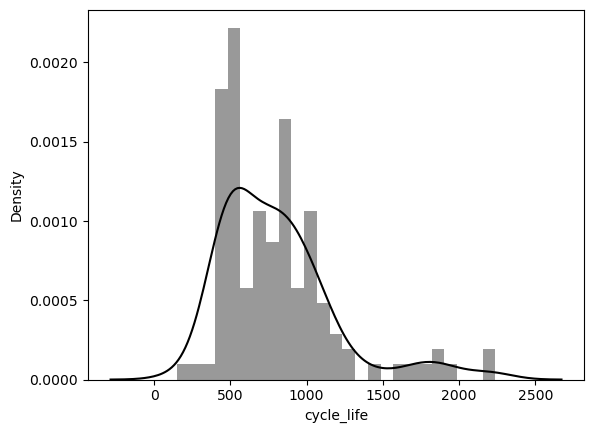

In [11]:
sns.distplot(dataset['cycle_life'],bins=25,kde=True,color='k')

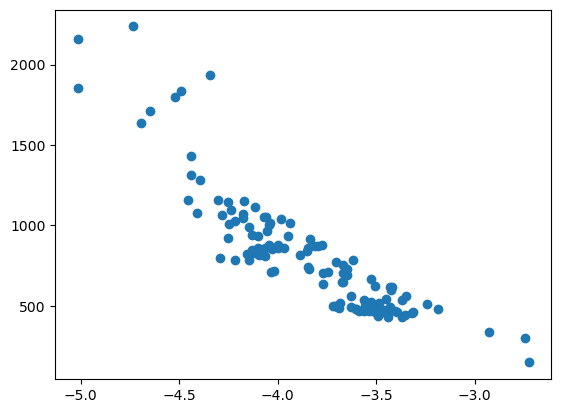

In [12]:
#dq_variance
plt.scatter(np.log10(dataset['dq_variance']),dataset['cycle_life'])


In [13]:
np.corrcoef(np.log10(dataset['dq_variance']),dataset['cycle_life'])

array([[ 1.        , -0.88974274],
       [-0.88974274,  1.        ]])

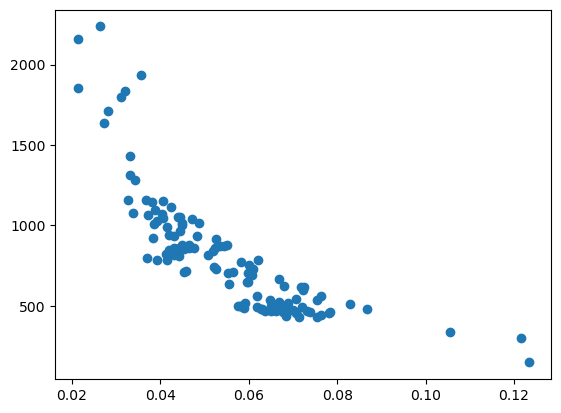

In [14]:
plt.scatter(np.cbrt(dataset['dq_variance']),dataset['cycle_life'])

In [15]:
np.corrcoef(np.cbrt(dataset['dq_variance']),dataset['cycle_life'])

array([[ 1.        , -0.80846817],
       [-0.80846817,  1.        ]])

In [16]:
#plt.scatter(np.log(dataset['dq_variance']),np.log10(dataset['cycle_life']))

In [17]:
#plt.scatter(((dataset['dq_variance']-np.mean(dataset['dq_variance'])/np.std(dataset['dq_variance']))),np.log10(dataset['cycle_life']))

In [18]:
print("*********** Original data*******************")
print(dataset['cycle_life'].describe())
print("skew : ",skew(dataset['cycle_life']))
print("kurt : ",kurtosis(dataset['cycle_life']))

*********** Original data*******************
count     124.000000
mean      801.637097
std       379.717082
min       148.000000
25%       498.750000
50%       736.500000
75%       946.500000
max      2237.000000
Name: cycle_life, dtype: float64
skew :  1.5722118774617826
kurt :  2.9001076537372352


In [19]:
#Selecting Features and Target,  X1=features, Y1=Target
X1=dataset.drop(["cycle_life",'Unnamed: 0'],axis=1)

In [20]:
X1

,dq_min,dq_mean,dq_variance,dq_skewness,dq_kurtosis,slope_100_2,intercept_100_2,discharge_capacity_2,discharge_capacity_100,diff_QD_n_2,slope_100_91,intercept_100_91,ave_chg_time_5_1,max_temp_100_2,min_temp_100_2,Integral_temp_100_2,integral_resistance_2,minimum_IR,difference_IR_100_2
0,-0.008460,-0.002873,0.000010,-0.532058,-1.348312,-2.137460e-04,1.091381,1.070689,1.075913,0.468365,0.000046,1.071447,13.374894,31.632496,31.266918,18.742036,0.016742,0.000000,-0.000075
1,-0.011004,-0.004100,0.000010,-0.429375,-1.029116,6.676023e-06,1.080926,1.075301,1.080630,0.009288,-0.000037,1.084382,13.409150,31.376623,31.076239,19.743747,0.017039,0.000000,-0.000042
2,-0.017216,-0.004487,0.000018,-1.080194,0.348637,1.149798e-05,1.084805,1.079922,1.084940,0.008131,-0.000040,1.088961,13.358242,31.447081,31.146742,19.985985,0.016868,0.000000,-0.000014
3,-0.018961,-0.007456,0.000036,-0.439050,-1.095416,1.846790e-05,1.084030,1.079723,1.084750,0.006530,-0.000002,1.084960,12.025140,29.982986,29.857000,18.640968,0.016370,0.000000,0.000039
4,-0.013958,-0.005750,0.000023,-0.362548,-1.333831,2.046078e-05,1.081825,1.078417,1.082646,0.005900,-0.000034,1.085988,12.041851,31.433310,31.181360,21.154489,0.016787,0.000000,-0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.017458,-0.006428,0.000035,-0.292539,-1.003013,-5.631454e-06,1.050886,1.047404,1.049504,0.004107,-0.000005,1.050216,10.043833,34.218964,33.899652,51.489886,0.015741,0.015481,-0.000155
120,-0.022054,-0.009079,0.000051,-0.315431,-1.138513,-6.625013e-06,1.063355,1.059324,1.061757,0.004510,-0.000042,1.066049,10.043563,33.911189,32.981926,66.841951,0.015562,0.014996,-0.000234
121,-0.024193,-0.009748,0.000060,-0.357134,-1.063130,1.066398e-05,1.053846,1.050522,1.054153,0.004362,-0.000057,1.059706,10.042974,33.621746,32.648149,72.070386,0.018542,0.017007,-0.000173
122,-0.025985,-0.011231,0.000074,-0.244616,-1.238396,5.494642e-06,1.073051,1.069720,1.072928,0.004185,-0.000028,1.075614,10.043436,33.111576,32.626095,64.641417,0.015723,0.015505,-0.000106


In [21]:
X1=X1[['dq_min','dq_variance','slope_100_2','intercept_100_2',
    'discharge_capacity_2','ave_chg_time_5_1','Integral_temp_100_2',
   'minimum_IR','difference_IR_100_2']]

In [22]:
X1

,dq_min,dq_variance,slope_100_2,intercept_100_2,discharge_capacity_2,ave_chg_time_5_1,Integral_temp_100_2,minimum_IR,difference_IR_100_2
0,-0.008460,0.000010,-2.137460e-04,1.091381,1.070689,13.374894,18.742036,0.000000,-0.000075
1,-0.011004,0.000010,6.676023e-06,1.080926,1.075301,13.409150,19.743747,0.000000,-0.000042
2,-0.017216,0.000018,1.149798e-05,1.084805,1.079922,13.358242,19.985985,0.000000,-0.000014
3,-0.018961,0.000036,1.846790e-05,1.084030,1.079723,12.025140,18.640968,0.000000,0.000039
4,-0.013958,0.000023,2.046078e-05,1.081825,1.078417,12.041851,21.154489,0.000000,-0.000053
...,...,...,...,...,...,...,...,...,...
119,-0.017458,0.000035,-5.631454e-06,1.050886,1.047404,10.043833,51.489886,0.015481,-0.000155
120,-0.022054,0.000051,-6.625013e-06,1.063355,1.059324,10.043563,66.841951,0.014996,-0.000234
121,-0.024193,0.000060,1.066398e-05,1.053846,1.050522,10.042974,72.070386,0.017007,-0.000173
122,-0.025985,0.000074,5.494642e-06,1.073051,1.069720,10.043436,64.641417,0.015505,-0.000106


In [23]:
X1.corr()

,dq_min,dq_variance,slope_100_2,intercept_100_2,discharge_capacity_2,ave_chg_time_5_1,Integral_temp_100_2,minimum_IR,difference_IR_100_2
dq_min,1.000000,-0.947379,0.627572,-0.247067,-0.182889,0.323653,0.097880,-0.187527,0.219502
dq_variance,-0.947379,1.000000,-0.755600,0.177773,0.097456,-0.215013,0.024383,0.182286,-0.210517
slope_100_2,0.627572,-0.755600,1.000000,-0.079054,0.073269,0.062232,-0.176097,-0.071306,0.378328
intercept_100_2,-0.247067,0.177773,-0.079054,1.000000,0.938286,0.218156,-0.575403,-0.480232,-0.081517
discharge_capacity_2,-0.182889,0.097456,0.073269,0.938286,1.000000,0.189208,-0.540515,-0.469944,0.191249
ave_chg_time_5_1,0.323653,-0.215013,0.062232,0.218156,0.189208,1.000000,-0.386473,-0.534305,0.165791
Integral_temp_100_2,0.097880,0.024383,-0.176097,-0.575403,-0.540515,-0.386473,1.000000,0.715416,-0.015336
minimum_IR,-0.187527,0.182286,-0.071306,-0.480232,-0.469944,-0.534305,0.715416,1.000000,-0.088212
difference_IR_100_2,0.219502,-0.210517,0.378328,-0.081517,0.191249,0.165791,-0.015336,-0.088212,1.000000


<Figure size 3000x4000 with 0 Axes>

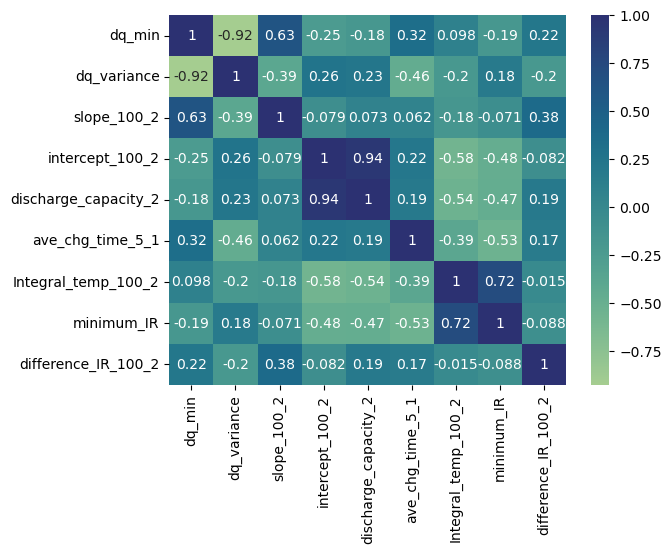

<Figure size 3000x4000 with 0 Axes>

In [99]:
sns.heatmap(X1.corr(), cmap="crest", annot=True)
plt.figure(figsize=(30,40))

In [25]:
export=pd.concat([X1,dataset["cycle_life"]],axis=1)

In [26]:
export.to_csv('sisso.csv',sep=' ')

In [27]:
X1['dq_variance']=np.log10(X1['dq_variance'])

C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\3541331533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['dq_variance']=np.log10(X1['dq_variance'])


In [28]:
#X1 = preprocessing.scale(X1)

In [29]:
Y1=dataset["cycle_life"]

In [30]:
#Y1=Y.apply(lambda x: np.sqrt(x))
#Y1=Y.apply(lambda x: x**(1/3))
#Y1=Y.apply(lambda x: np.log(x))
#Y1=Y.apply(lambda x: x**(-0.375))
#Y1=Y
#Y1.hist(bins=20)
#print("*********** Original data*******************")
#print(Y1.describe())
#print("skew : ",skew(Y1))
#print("kurt : ",kurtosis(Y1))

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X1[0:83], Y1[0:83],
                                                    test_size = 0.4, random_state=1000)

In [32]:
#X_train=X1[0:40]
#Y_train=Y1[0:40]

In [33]:
#X_test=X1[41:83]
#Y_test=Y1[41:83]

In [34]:
X_val=X1[84:123]
Y_val=Y1[84:123]

# Regression with Linear Regression

In [35]:
model=LinearRegression()
#model=ElasticNet()

In [36]:
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 68.70873635205491
R2 score is 0.9593712165048153


In [38]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 103.48934739066195
R2 score is 0.9289656260072137


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\2881953538.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


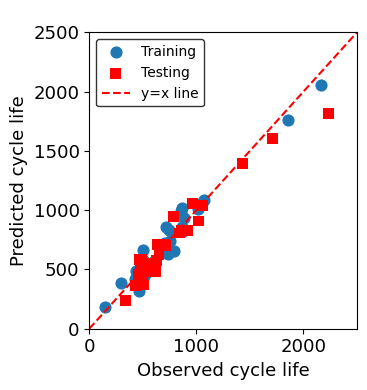

In [39]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
# plt.xticks(np.linspace(0,2,0.5,endpoint=True))
plt.ylim((0,2500))
# plt.yticks(np.linspace(0,2,0.5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

In [40]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 272.6502957444579
R2 score is 0.06705344488737486


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\3761464373.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


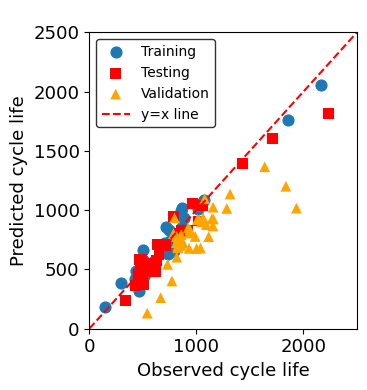

In [41]:
#### define your data plot here       
plt.figure(figsize=(4,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
# plt.xticks(np.linspace(0,2,0.5,endpoint=True))
plt.ylim((0,2500))
# plt.yticks(np.linspace(0,2,0.5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Testing',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Validation',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
plt.tight_layout()
leg = plt.legend()
leg.get_frame().set_edgecolor('black')

### Optimization of Hyperparameters, e.g., alpha, and l1_ratio
$ 1/(2*n_{samples}) * ||y - Xw||^2
+ \alpha * L1_{ratio} * ||w||
+ 0.5 * \alpha * (1 - L1_{ratio}) * ||w||^2 $
1. Here I am using GridSearchCV/ElasticNetCV tools of sklearn

In [42]:
from sklearn.linear_model import ElasticNetCV

In [43]:
alpha_x=np.linspace(0.01,0.1,100)
l1_ratio_x=np.linspace(0,0.2,1000)

In [44]:
regr = ElasticNetCV(n_alphas=100,alphas=alpha_x,eps=0.0005,l1_ratio=l1_ratio_x,cv=7, random_state=11110,max_iter=5000)
regr.fit(X_train,Y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680967.283644269, tolerance: 541.4505071428571
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase 

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438718.6428216314, tolerance: 541.4505071428571
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434298.67817465955, tolerance: 541.4505071428571
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may l

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438886.1089803715, tolerance: 543.8580476190476
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435579.3687944119, tolerance: 543.8580476190476
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may le

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459049.05796907836, tolerance: 543.8973904761905
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455668.1316603181, tolerance: 543.8973904761905
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may l

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510769.5101234041, tolerance: 537.3941642857144
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507363.1708208766, tolerance: 537.3941642857144
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may le

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538445.543043388, tolerance: 554.9708571428571
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535388.7934687617, tolerance: 554.9708571428571
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lea

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549286.2186753231, tolerance: 503.54916190476195
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546485.8141743579, tolerance: 503.54916190476195
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may 

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284083.658936101, tolerance: 180.27893333333333
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283408.82811835903, tolerance: 180.27893333333333
  model = cd_fast.enet_coordinate_descent_gram(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may 

ElasticNetCV(alphas=array([0.01      , 0.01090909, 0.01181818, 0.01272727, 0.01363636,
       0.01454545, 0.01545455, 0.01636364, 0.01727273, 0.01818182,
       0.01909091, 0.02      , 0.02090909, 0.02181818, 0.02272727,
       0.02363636, 0.02454545, 0.02545455, 0.02636364, 0.02727273,
       0.02818182, 0.02909091, 0.03      , 0.03090909, 0.03181818,
       0.03272727, 0.03363636, 0.03454545, 0.03545455, 0.03636364,
       0.03727273,...
       0.19319319, 0.19339339, 0.19359359, 0.19379379, 0.19399399,
       0.19419419, 0.19439439, 0.19459459, 0.19479479, 0.19499499,
       0.1951952 , 0.1953954 , 0.1955956 , 0.1957958 , 0.195996  ,
       0.1961962 , 0.1963964 , 0.1965966 , 0.1967968 , 0.196997  ,
       0.1971972 , 0.1973974 , 0.1975976 , 0.1977978 , 0.197998  ,
       0.1981982 , 0.1983984 , 0.1985986 , 0.1987988 , 0.198999  ,
       0.1991992 , 0.1993994 , 0.1995996 , 0.1997998 , 0.2       ]),
             max_iter=5000, random_state=11110)

In [45]:
regr

ElasticNetCV(alphas=array([0.01      , 0.01090909, 0.01181818, 0.01272727, 0.01363636,
       0.01454545, 0.01545455, 0.01636364, 0.01727273, 0.01818182,
       0.01909091, 0.02      , 0.02090909, 0.02181818, 0.02272727,
       0.02363636, 0.02454545, 0.02545455, 0.02636364, 0.02727273,
       0.02818182, 0.02909091, 0.03      , 0.03090909, 0.03181818,
       0.03272727, 0.03363636, 0.03454545, 0.03545455, 0.03636364,
       0.03727273,...
       0.19319319, 0.19339339, 0.19359359, 0.19379379, 0.19399399,
       0.19419419, 0.19439439, 0.19459459, 0.19479479, 0.19499499,
       0.1951952 , 0.1953954 , 0.1955956 , 0.1957958 , 0.195996  ,
       0.1961962 , 0.1963964 , 0.1965966 , 0.1967968 , 0.196997  ,
       0.1971972 , 0.1973974 , 0.1975976 , 0.1977978 , 0.197998  ,
       0.1981982 , 0.1983984 , 0.1985986 , 0.1987988 , 0.198999  ,
       0.1991992 , 0.1993994 , 0.1995996 , 0.1997998 , 0.2       ]),
             max_iter=5000, random_state=11110)

In [46]:
print(regr.alpha_)

0.01


In [47]:
print(regr.l1_ratio_)

0.2


In [48]:
regr.intercept_

-2742.7737089112866

In [49]:
regr.n_iter_

18

In [50]:
regr.dual_gap_

1.4668970563857606

In [51]:
model=LinearRegression()
#model=Lasso(alpha=2.40)
#model=ElasticNet(alpha=0.0000005,l1_ratio=0.9995,fit_intercept=True,tol=0.00001,max_iter=50000,random_state=1)


In [52]:
model.fit(X_train,Y_train)

LinearRegression()

In [53]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 68.70873635205491
R2 score is 0.9593712165048153


In [54]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 103.48934739066195
R2 score is 0.9289656260072137


In [55]:
X_val=X1[84:123]
Y_val=Y1[84:123]

In [56]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 272.6502957444579
R2 score is 0.06705344488737486


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


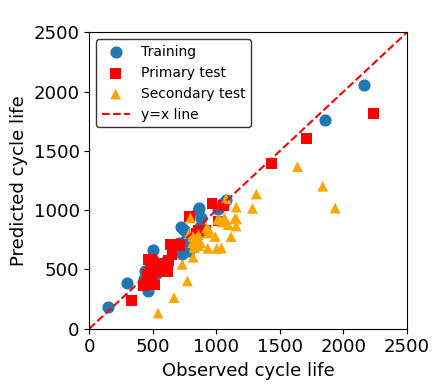

In [57]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [59]:
first_bit= np.log10(dataset["discharge_capacity_2"])/(dataset["dq_variance"])**(1/3)

In [60]:
second_bit=(dataset["dq_variance"]**(1/3))*(dataset["dq_variance"]/dataset["dq_variance"])

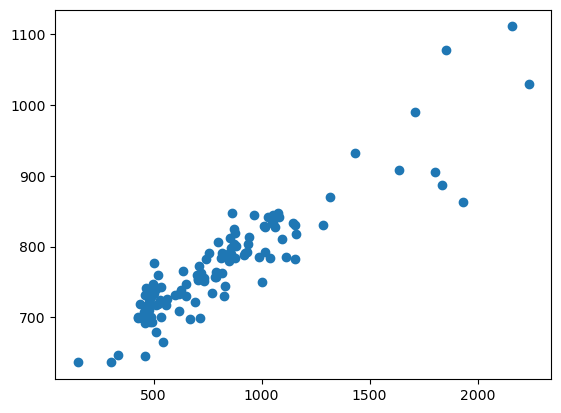

In [61]:
plt.scatter(dataset["cycle_life"], (0.3786262607E+03*first_bit)+(-0.6281856557E+02*second_bit)+0.5522646811E+03)
#plt.xlim(0,2000)
#plt.ylim(0,2000)

In [62]:
df_new= pd. DataFrame({'first_f':first_bit,
                     'second_f':second_bit,
                      })

In [63]:
Y2=dataset["cycle_life"]

In [64]:
df_new.shape

(124, 2)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(df_new[0:83], Y2[0:83],
                                                    test_size = 0.4, random_state=1000)

In [66]:
X_val=df_new[84:123]
#X_val=X1[84:123]
Y_val=Y2[84:123]

In [67]:
model=LinearRegression()
#model=ElasticNet(alpha=0.00001,l1_ratio=0.91,fit_intercept=True,tol=0.00001,max_iter=5000000,random_state=1)
model.fit(X_train,Y_train)

LinearRegression()

In [68]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 81.88464980764405
R2 score is 0.9422948082769338


In [69]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 126.61132124782779
R2 score is 0.8936781945617294


In [70]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 263.2355048082493
R2 score is 0.13037152666071838


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


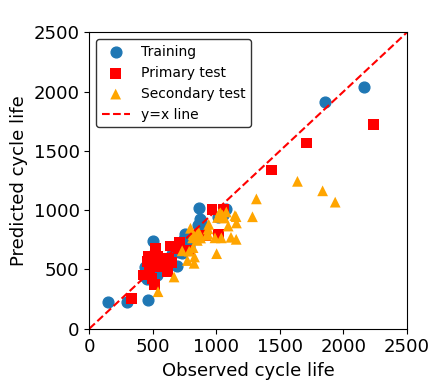

In [71]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()

In [72]:
dataset["difference_IR_100_2"]

0     -0.000075
1     -0.000042
2     -0.000014
3      0.000039
4     -0.000053
         ...   
119   -0.000155
120   -0.000234
121   -0.000173
122   -0.000106
123   -0.000080
Name: difference_IR_100_2, Length: 124, dtype: float64

In [73]:
#4D Descriptor
onebit= (dataset["dq_min"]/dataset["dq_variance"])*np.log10(dataset["discharge_capacity_2"])
#onebit= (dataset["dq_min"]/np.log10(dataset["dq_variance"]))*np.log10(dataset["discharge_capacity_2"])

In [74]:
twobit=(dataset["dq_variance"]*dataset["slope_100_2"])/(dataset["dq_variance"]-dataset["slope_100_2"])
#twobit=(np.log10(dataset["dq_variance"])*dataset["slope_100_2"])/(np.log(dataset["dq_variance"])-dataset["slope_100_2"])

In [75]:
threebit=np.abs((dataset["ave_chg_time_5_1"]/dataset["difference_IR_100_2"])-(dataset["Integral_temp_100_2"]/dataset["difference_IR_100_2"]))

In [76]:
fourbit=(dataset["difference_IR_100_2"]/dataset["dq_variance"])/(dataset["dq_variance"]+dataset["slope_100_2"])
#fourbit=(dataset["difference_IR_100_2"]/(np.log10(dataset["dq_variance"])))/(np.log10(dataset["dq_variance"])+dataset["slope_100_2"])

In [77]:
dq_new=pd.DataFrame({'obe_bit':onebit,
                    'two_bit': twobit,
                   'three_bit':threebit,
                   'fourbit':fourbit})

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(dq_new[0:83], Y2[0:83],
                                                    test_size = 0.4, random_state=1000)

In [79]:
X_val=dq_new[84:123]
#X_val=X1[84:123]
Y_val=Y2[84:123]

In [80]:
#model=ElasticNet(alpha=0.00001,l1_ratio=0.91,fit_intercept=True,tol=0.0001,max_iter=5000000,random_state=1)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [81]:
#### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for training set
--------------------------------------
RMSE is 78.89407942127242
R2 score is 0.946432827619902


In [82]:
# model evaluation for test set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 103.1727632470033
R2 score is 0.9293995636051264


In [83]:
# model evaluation for Validation set
y_val_predict = model.predict(X_val)
rmse_val = (np.sqrt(mean_squared_error(Y_val, y_val_predict)))
r2_val = r2_score(Y_val, y_val_predict)
print("The model performance for validation set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_val))
print('R2 score is {}'.format(r2_val))

The model performance for validation set
--------------------------------------
RMSE is 338.12734350214225
R2 score is -0.4348463727167933


C:\Users\Samarthya's Laptop\AppData\Local\Temp\ipykernel_7228\2507113549.py:21: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')


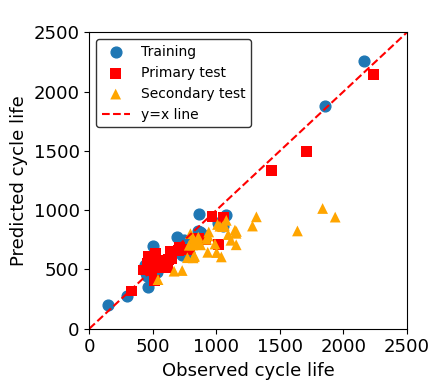

In [84]:
#### define your data plot here       
plt.figure(figsize=(4.5,4),dpi=100)
plt.title(' ', fontsize=13) 
#### define your data plot here       
plt.xlim((0,2500))
plt.xticks(np.linspace(0,2500,6,endpoint=True))
plt.ylim((0,2500))
plt.yticks(np.linspace(0,2500,6,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',
            s=60,marker='o')
plt.scatter(Y_test,y_test_predict, label='Primary test',
            facecolors='red',alpha=1, edgecolors='none',s=60, marker='s')
plt.scatter(Y_val, y_val_predict, label='Secondary test',
            facecolors='orange',alpha=1, edgecolors='none',s=60, marker='^')
plt.xlabel("Observed cycle life",fontsize=13)
plt.ylabel("Predicted cycle life",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((0,2500),(0,2500), 'r-',linestyle='dashed',label='y=x line')
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()